# Task1 : overview of the dataset
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [2]:
#Import the necessory library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC

sns.set_style('darkgrid')
from matplotlib.pyplot import figure
from sklearn.svm import SVC 
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Task 2 : data preparation, cleaning, and EDA


## GET SOME INFORMATION ABOUT THE DATA 

In [3]:
#Roading the csv data 
HealthD = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
#print the first 5 rows of the dataset
HealthD.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#print the last 5 rows of the dataset
HealthD.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
HealthD.rename(columns = {'heart_disease':'heartDisease', 'ever_married':'everMarried','work_type ':'workType','Residence_type':'ResidenceType','avg_glucose_level':'avgGlucoseLevel','smoking_status':'smokingStatus','work_type':'workType'}, inplace = True)

list(HealthD) #Rename coulmns name to be consistant names

['id',
 'gender',
 'age',
 'hypertension',
 'heartDisease',
 'everMarried',
 'workType',
 'ResidenceType',
 'avgGlucoseLevel',
 'bmi',
 'smokingStatus',
 'stroke']

### EDA non-graphical

In [7]:
HealthD.shape #to know the coulmns and rows number

(5110, 12)

In [8]:
HealthD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5110 non-null   int64  
 1   gender           5110 non-null   object 
 2   age              5110 non-null   float64
 3   hypertension     5110 non-null   int64  
 4   heartDisease     5110 non-null   int64  
 5   everMarried      5110 non-null   object 
 6   workType         5110 non-null   object 
 7   ResidenceType    5110 non-null   object 
 8   avgGlucoseLevel  5110 non-null   float64
 9   bmi              4909 non-null   float64
 10  smokingStatus    5110 non-null   object 
 11  stroke           5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
#get statical measure about the data
#numircal coulmns
HealthD.describe() # we can see here the measure of center : mean,std
                   # also we can know MEASURE OF SPRED : the five number

,id,age,hypertension,heartDisease,avgGlucoseLevel,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
#catgorical coulmns
HealthD.describe(include=['O']) 

,gender,everMarried,workType,ResidenceType,smokingStatus
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [11]:
HealthD.median() # contenious of measure of center MEDIAN 

id                 36932.000
age                   45.000
hypertension           0.000
heartDisease           0.000
avgGlucoseLevel       91.885
bmi                   28.100
stroke                 0.000
dtype: float64

In [12]:
d=HealthD.mode()
d.head()# contenious of measure of center MODE 

,id,gender,age,hypertension,heartDisease,everMarried,workType,ResidenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,67,Female,78.0,0.0,0.0,Yes,Private,Urban,93.88,28.7,never smoked,0.0
1,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# contenious of MEASURE OF SPREAD -range -> max-min , -IQR:dis between(3rdQand1st), -VARIANCE

rangeAGE= max(HealthD["age"]-min(HealthD["age"]))
rangeGL= max(HealthD["avgGlucoseLevel"]-min(HealthD["avgGlucoseLevel"]))
rangebmi= max(HealthD["bmi"]-min(HealthD["bmi"]))

print("the range of age =",rangeAGE)
print("the range of avgGlucoseLevel =",rangeGL)
print("the range of bmi =",rangebmi)

print("*******************************")
print("*******************************")

quaAGE= HealthD["age"].quantile(0.75)-HealthD["age"].quantile(0.25)
quaGAL= quaAGE= HealthD["avgGlucoseLevel"].quantile(0.75)-HealthD["avgGlucoseLevel"].quantile(0.25)
quabmi= HealthD["bmi"].quantile(0.75)-HealthD["bmi"].quantile(0.25)

print("the IQR of age =",rangeAGE)
print("the IQR of avgGlucoseLevel =",quaGAL)
print("the IQR of bmi =",quabmi)

print("*******************************")
print("*******************************")

print("the variance of age =",HealthD["age"].var())
print("the variance of avgGlucoseLevel =",HealthD["avgGlucoseLevel"].var())
print("the variance of bmi =",HealthD["bmi"].var())

the range of age = 81.92
the range of avgGlucoseLevel = 216.62
the range of bmi = 87.3
*******************************
*******************************
the IQR of age = 81.92
the IQR of avgGlucoseLevel = 36.845
the IQR of bmi = 9.600000000000001
*******************************
*******************************
the variance of age = 511.33179182433673
the variance of avgGlucoseLevel = 2050.600819911381
the variance of bmi = 61.68636419426877


In [14]:
HealthD.isnull().sum() # to know if there is any missing data 
# we found there is 201 missing in BMI coulmn 

id                   0
gender               0
age                  0
hypertension         0
heartDisease         0
everMarried          0
workType             0
ResidenceType        0
avgGlucoseLevel      0
bmi                201
smokingStatus        0
stroke               0
dtype: int64

<AxesSubplot:>

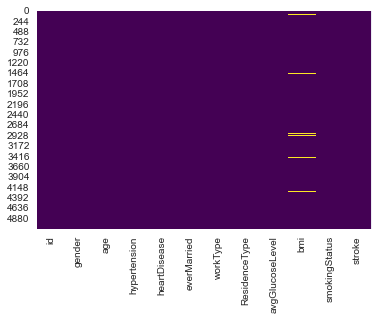

In [15]:
#visualizing null values :
sns.heatmap(HealthD.isnull(),cbar=False,cmap='viridis')

In [16]:
#check number of duplication records
dupl=HealthD.duplicated()
sum(dupl)

0

In [17]:
for col in HealthD:
    print(col)
    print(HealthD[col].unique())
    print('\n')
    #to know if there is any inconsist value in any coulmn& to know what are the values in each coulmn

id
[ 9046 51676 31112 ... 19723 37544 44679]


gender
['Male' 'Female' 'Other']


age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1

In [18]:
#information about the distribution of the target value
d=HealthD['stroke'].value_counts()
#Percentage for  having stroke our targer value 
print(d)
print('\n')
print('PERCENTGE:')
print('\n')
Percent_d = d[1]/ d.sum() * 100
print("Percent who have stroke:",Percent_d )
print("---------------------")
#Percentage for  not having stroke
Percent_d = d[0]/ d.sum() * 100
print("Percent who haven't stroke:",Percent_d )
# here we oserved that is imbalenced

0    4861
1     249
Name: stroke, dtype: int64


PERCENTGE:


Percent who have stroke: 4.87279843444227
---------------------
Percent who haven't stroke: 95.12720156555773


In [19]:
#checking the description of the people with stoke (our targer value)
HealthD[HealthD.stroke == 1].describe() #for numircal coulmns ONLY 

,id,age,hypertension,heartDisease,avgGlucoseLevel,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [20]:
#checking the description of the people without stoke (our targer value)
HealthD[HealthD.stroke == 0].describe() #for numircal coulmns ONLY 

,id,age,hypertension,heartDisease,avgGlucoseLevel,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4700.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.908287,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.400000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.000000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


In [21]:
HealthD[HealthD.stroke == 1].describe(include=['O'])  

,gender,everMarried,workType,ResidenceType,smokingStatus
count,249,249,249,249,249
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,141,220,149,135,90


In [22]:
HealthD[HealthD.stroke == 1].describe(include=['O']) 

,gender,everMarried,workType,ResidenceType,smokingStatus
count,249,249,249,249,249
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,141,220,149,135,90


In [23]:
HealthD['bmi'].describe() # we observed here that BMI coulmn is numircal&continious so we will fill it with the mean

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

### Cleaning

In [24]:
HealthD['bmi'].fillna(HealthD['bmi'].mean(),inplace=True) #fill null with mean
HealthD['bmi'].isnull().sum()#check the null again after fill

0

In [25]:
# after we osearved all coulmn we decide to drop the ID coulmn because it will not help us 
cols_to_drop=['id']
HealthD=HealthD.drop(cols_to_drop,axis=1)
HealthD.head()

,gender,age,hypertension,heartDisease,everMarried,workType,ResidenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<Figure size 6400x4800 with 0 Axes>

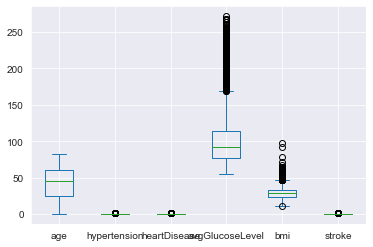

In [26]:
#outliers detection
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')
HealthD.plot(kind='box')
plt.show()
#To know if there is any outlier , we have alot so remove it can be difficult

### Graphical EDA

### univariate

<Figure size 2160x2160 with 0 Axes>

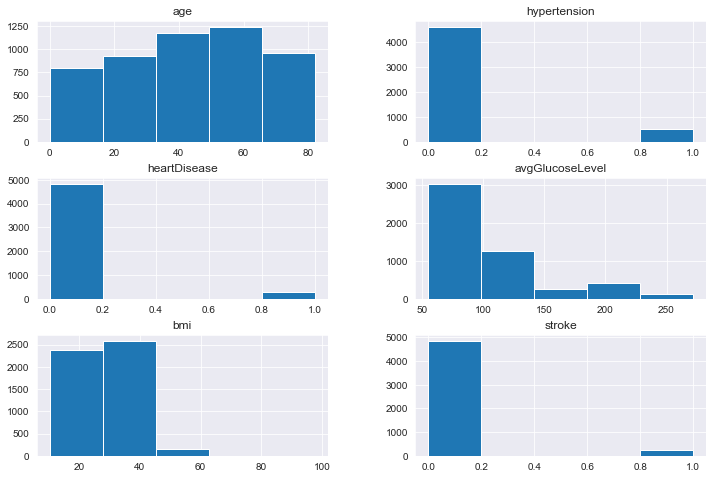

In [27]:
#counting and plotting counts whole dataframe in one pic
plt.figure(figsize=(30,30))
# for all numeric
HealthD.hist(bins=5,figsize=(12,8));

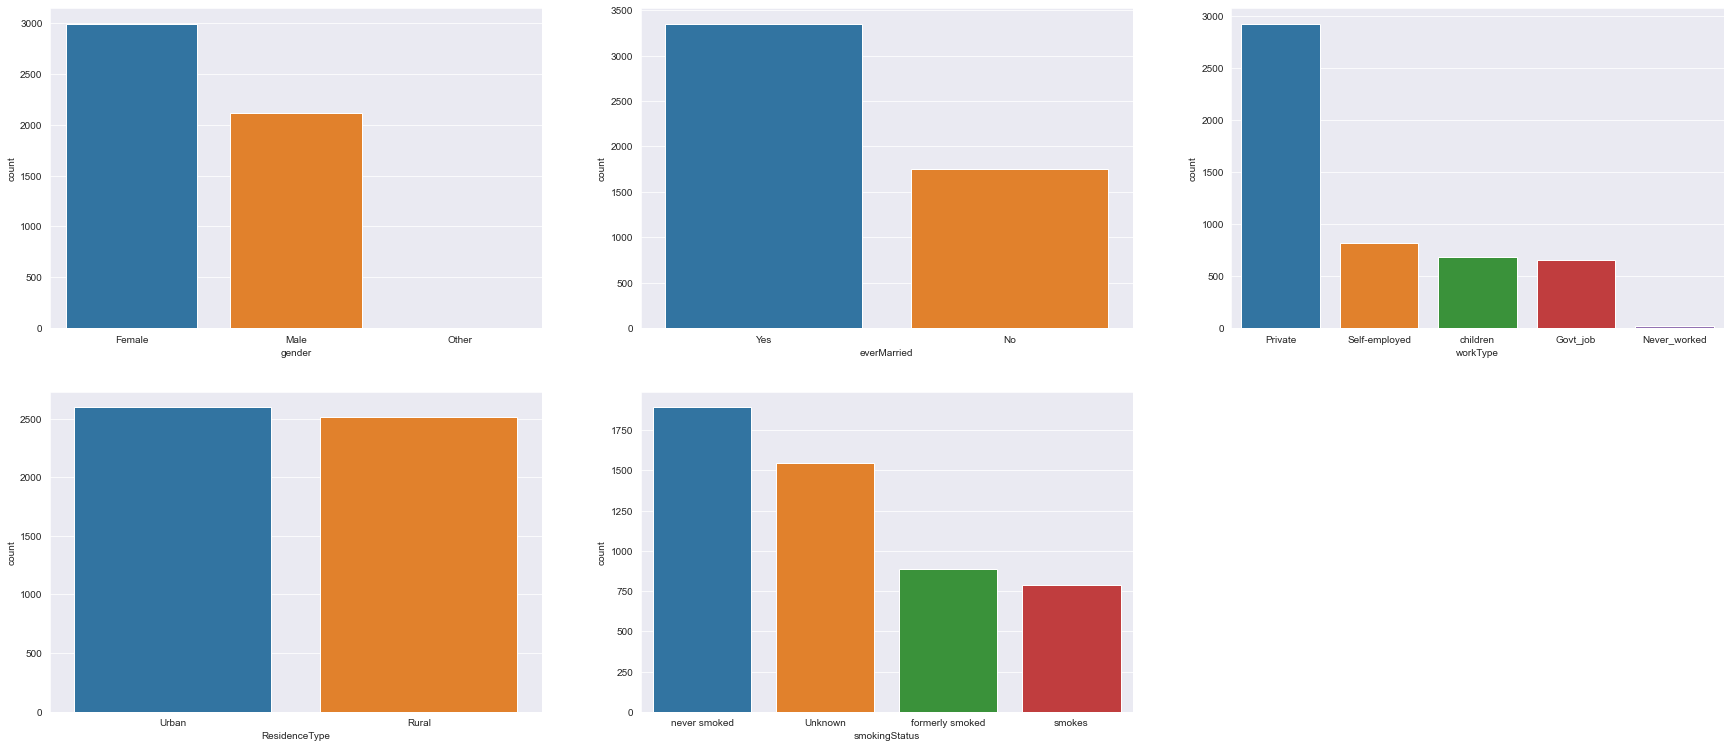

In [28]:
#Plot for categorical variables: 
categ_features =  [ 'gender','everMarried','workType','ResidenceType','smokingStatus']

fig = plt.figure(figsize=(30, 20))
for i in range (0,len(categ_features)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(x=categ_features[i], order=HealthD[categ_features[i]].value_counts().index, data=HealthD)

plt.show();


<AxesSubplot:xlabel='stroke', ylabel='count'>

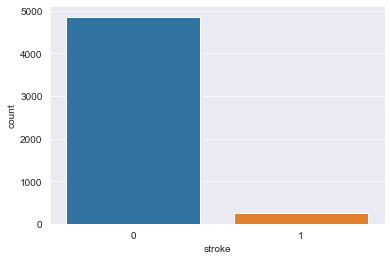

In [29]:
#plot of tthe class lable : 
sns.countplot(x='stroke', data=HealthD,order=HealthD['stroke'].value_counts().index)
#IMPALENCD


Text(0.5, 1.0, 'Kde Plots for age, avgGlucoseLevel and bmi')

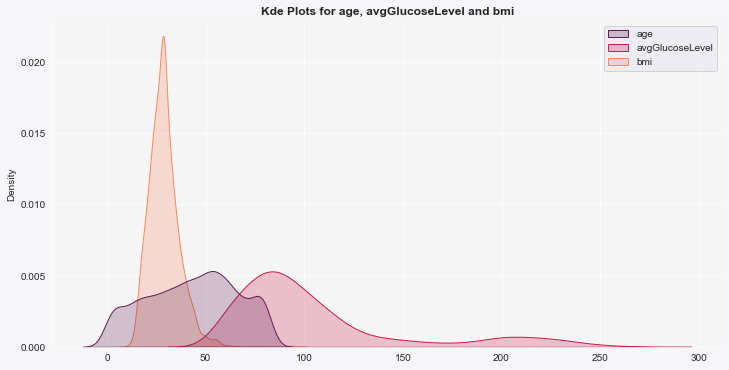

In [30]:
#Numerical Variable analysis
data_numerical=HealthD[['age','avgGlucoseLevel','bmi']]
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=data_numerical,shade=True,palette='rocket') # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for age, avgGlucoseLevel and bmi',weight='bold')


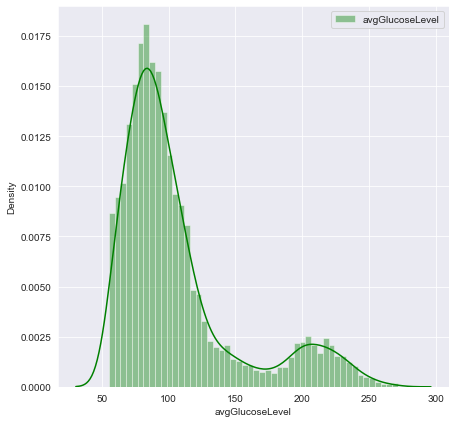

In [31]:
#Distribution Plot for avg_glucose_level
fig = plt.figure(figsize=(7,7))
sns.distplot(HealthD.avgGlucoseLevel, color="green", label="avgGlucoseLevel", kde= True)
plt.legend()

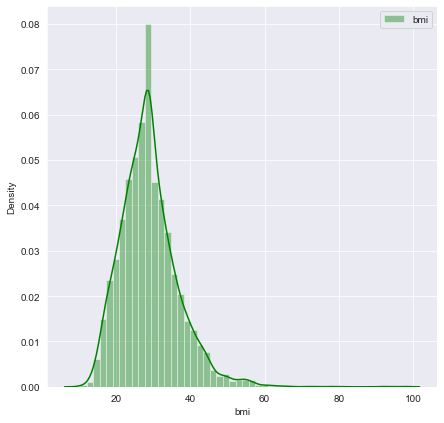

In [32]:
#Distribution Plot for bmi
fig = plt.figure(figsize=(7,7))
sns.distplot(HealthD.bmi, color="green", label="bmi", kde= True)
plt.legend()

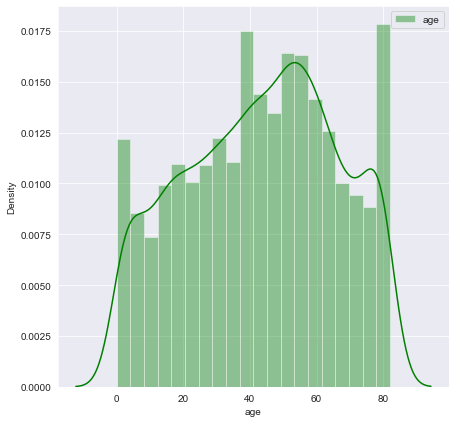

In [33]:
#Distribution Plot for age
fig = plt.figure(figsize=(7,7))
sns.distplot(HealthD.age, color="green", label="age", kde= True)
plt.legend()

### bivariate 

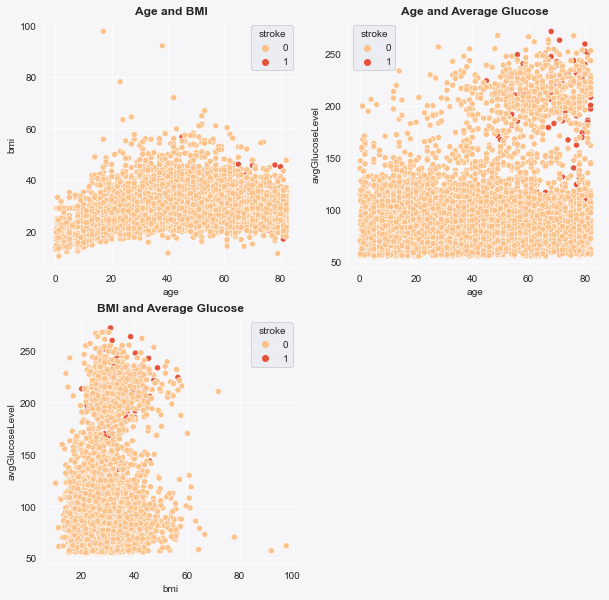

In [34]:
#Bivariate analysis of Numerical Variables
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
axes=[ax0,ax1,ax2]
data_categorical=HealthD[['gender', 'hypertension', 'heartDisease', 'everMarried','workType', 'ResidenceType', 
                       'smokingStatus', 'stroke']]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
# Age and bmi
sns.scatterplot(ax=ax0,x=data_numerical['age'],y=data_numerical['bmi'],hue=data_categorical['stroke'],palette="OrRd")
ax0.set_title('Age and BMI',fontweight='bold')
# Age and Glucose
sns.scatterplot(ax=ax1,x=data_numerical['age'],y=data_numerical['avgGlucoseLevel'],hue=data_categorical['stroke'],palette="OrRd")
ax1.set_title('Age and Average Glucose',fontweight='bold')
# BMI and Glucose
sns.scatterplot(ax=ax2,x=data_numerical['bmi'],y=data_numerical['avgGlucoseLevel'],hue=data_categorical['stroke'],palette="OrRd")
ax2.set_title('BMI and Average Glucose',fontweight='bold')
#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    


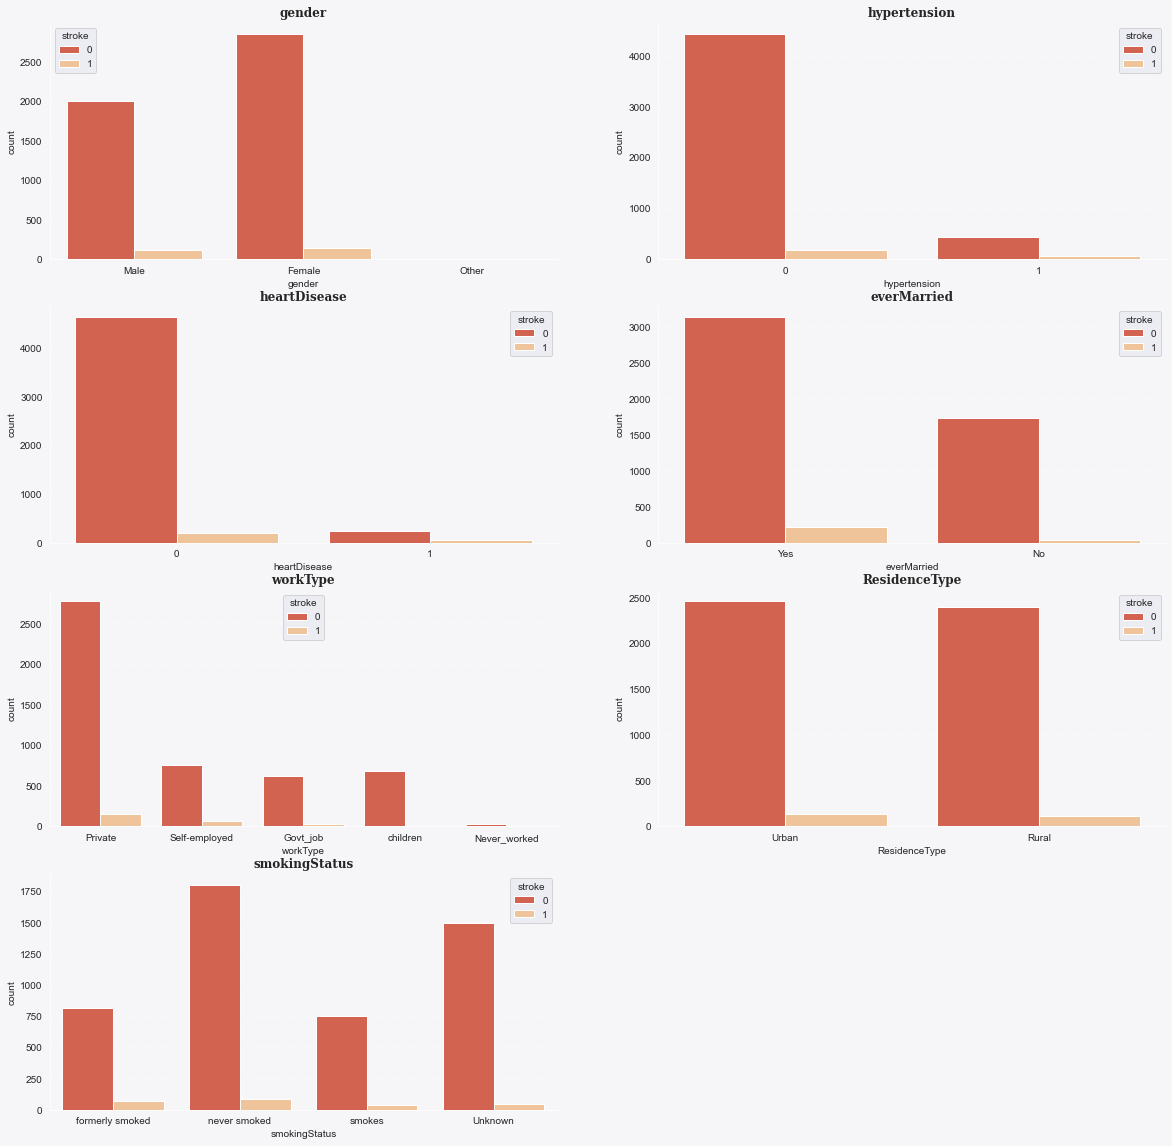

In [35]:
#Analysing Categorical Variables with Stroke
data_cat=HealthD[['gender', 'hypertension', 'heartDisease', 'everMarried','workType', 'ResidenceType', 
                       'smokingStatus']]
fig=plt.figure(figsize=(20,20))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette='OrRd_r',hue=HealthD['stroke'])
    


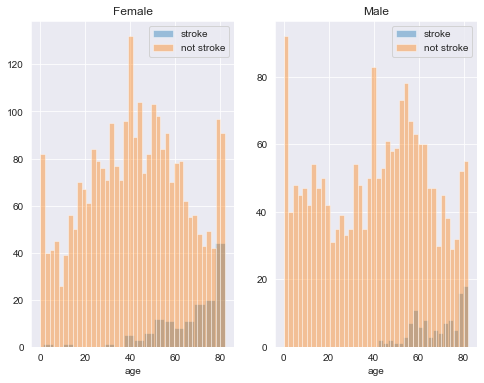

In [36]:

#3.plot target variable with age and gender
stroke = 'stroke'
not_stroke = 'not stroke'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(8, 6))
women = HealthD[HealthD['gender']=='Female']
men = HealthD[HealthD['gender']=='Male']
ax = sns.distplot(women[women['stroke']==1].age.dropna(), bins=18, label = stroke, ax = axes[0], kde =False)
ax = sns.distplot(women[women['stroke']==0].age.dropna(), bins=40, label = not_stroke, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['stroke']==1].age.dropna(), bins=18, label = stroke, ax = axes[1], kde = False)
ax = sns.distplot(men[men['stroke']==0].age.dropna(), bins=40, label = not_stroke, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

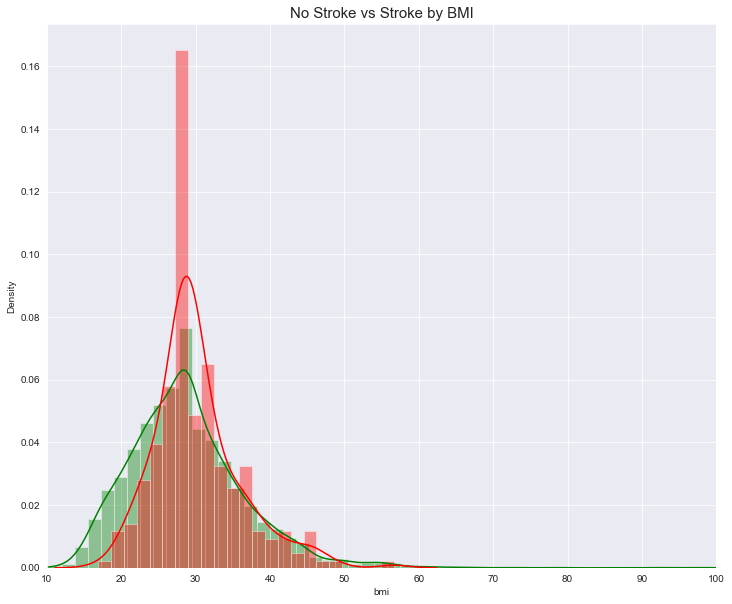

In [37]:
#plot distrepition
#No Stroke vs Stroke by BMI 
plt.figure(figsize=(12,10))

sns.distplot(HealthD[HealthD['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(HealthD[HealthD['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()



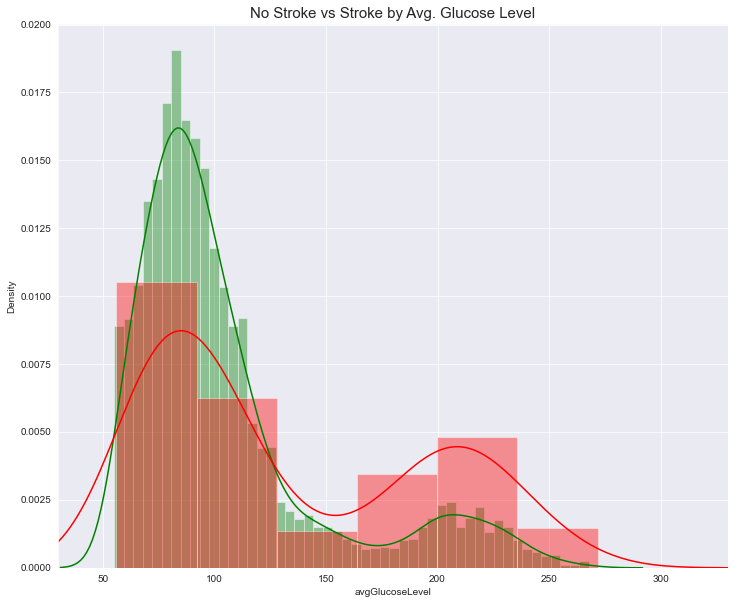

In [38]:
#No Stroke vs Stroke by Avg. Glucose Level
plt.figure(figsize=(12,10))

sns.distplot(HealthD[HealthD['stroke'] == 0]["avgGlucoseLevel"], color='green') # No Stroke - green
sns.distplot(HealthD[HealthD['stroke'] == 1]["avgGlucoseLevel"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()



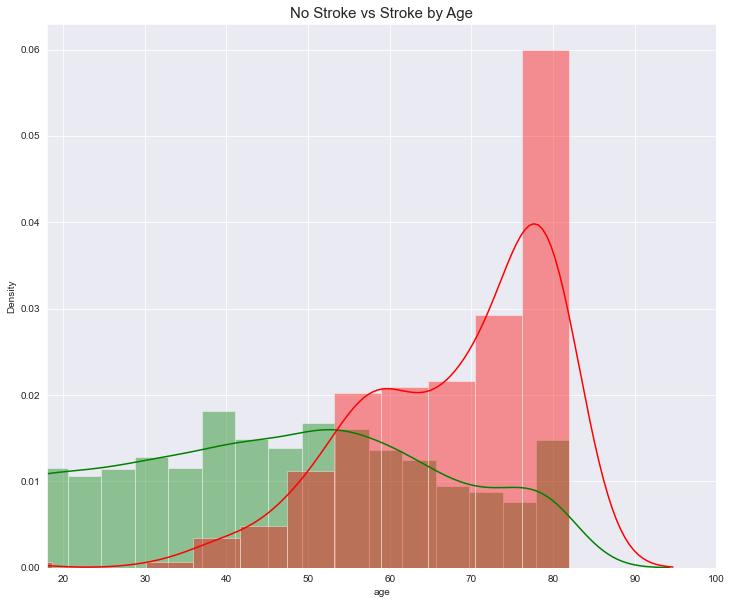

In [39]:
#No Stroke vs Stroke by Age
plt.figure(figsize=(12,10))

sns.distplot(HealthD[HealthD['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(HealthD[HealthD['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()



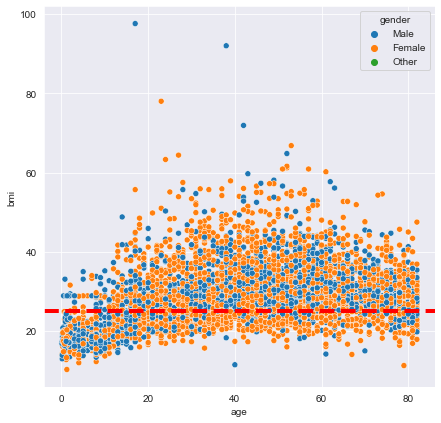

In [40]:
#Scatter Plot
#Age vs BMI
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=HealthD, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()



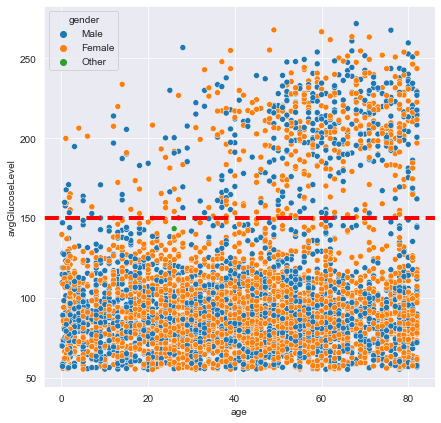

In [41]:
#Scatter Plot
#Age vs Avg. Glucose Level
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=HealthD, x="age", y="avgGlucoseLevel", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()



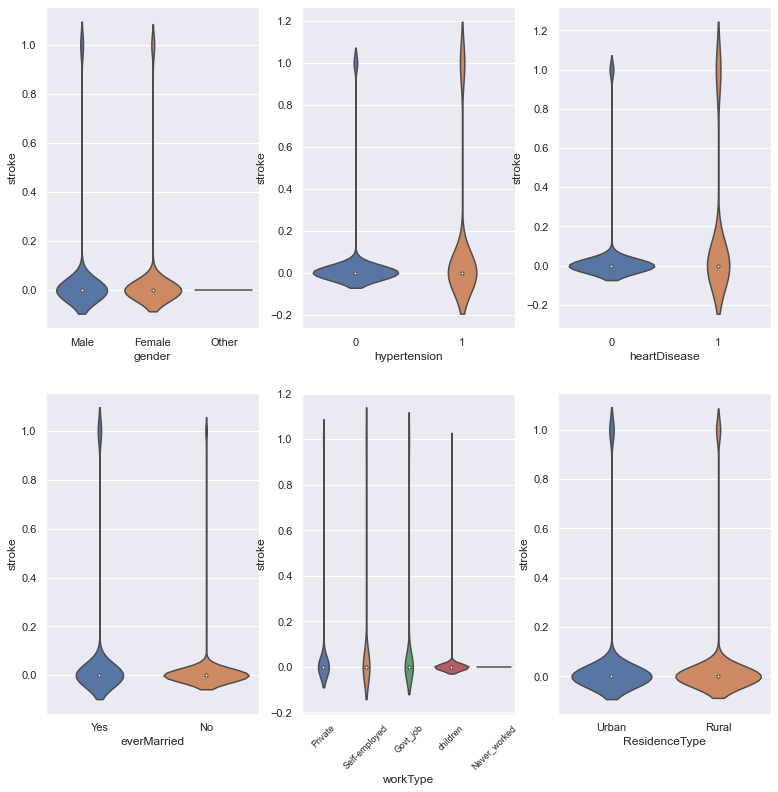

In [42]:
#Violin Plot 
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = HealthD)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = HealthD)
plt.subplot(2,3,3)
sns.violinplot(x = 'heartDisease', y = 'stroke', data = HealthD)
plt.subplot(2,3,4)
sns.violinplot(x = 'everMarried', y = 'stroke', data = HealthD)
plt.subplot(2,3,5)
sns.violinplot(x = 'workType', y = 'stroke', data = HealthD)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'ResidenceType', y = 'stroke', data = HealthD)
plt.show()

### Multivariate

<Figure size 1080x576 with 0 Axes>

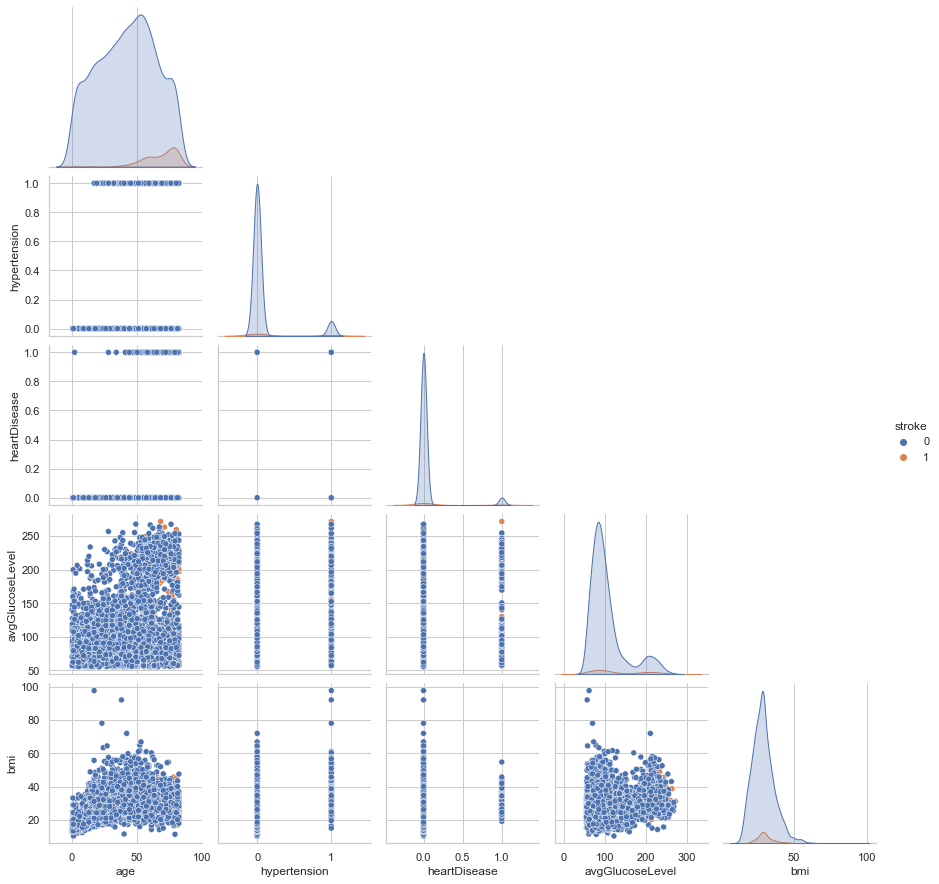

In [43]:
fig = plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.pairplot(HealthD,hue='stroke',corner=True);
plt.show()

In [44]:
correlations=HealthD.corr() #corlations of(numircal) coulmns with our target value
print(correlations["stroke"]) # age is most  

age                0.245257
hypertension       0.127904
heartDisease       0.134914
avgGlucoseLevel    0.131945
bmi                0.038947
stroke             1.000000
Name: stroke, dtype: float64


since the corr() function just for numircal coulmn we will do feature Enginering

### Task 3 : Feature Engenering 

In [45]:
#converting gender to 0 and 1 ,2 
HealthD['gender'].replace("Female", 0,inplace=True)
HealthD['gender'].replace("Male", 1,inplace=True)
HealthD['gender'].replace("Other", 2,inplace=True)
HealthD['gender'] = pd.to_numeric(HealthD['gender'])

In [46]:
print(HealthD.workType.value_counts()) # five types

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: workType, dtype: int64


In [47]:
print(HealthD.ResidenceType.value_counts()) # two types

Urban    2596
Rural    2514
Name: ResidenceType, dtype: int64


In [48]:
#converting ResidenceType to 1 and2 :
HealthD['ResidenceType'].replace("Urban", 1,inplace=True)
HealthD['ResidenceType'].replace("Rural", 2,inplace=True)

In [49]:
print(HealthD.smokingStatus.value_counts()) # 4 types

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smokingStatus, dtype: int64


In [50]:
#converting smokingStatus to 1,2,3 and 4 :
HealthD['smokingStatus'].replace("never smoked", 1,inplace=True)
HealthD['smokingStatus'].replace("Unknown", 2,inplace=True)
HealthD['smokingStatus'].replace("formerly smoked", 3,inplace=True)
HealthD['smokingStatus'].replace("smokes", 4,inplace=True)

In [51]:
#converting everMarried to 0 and 1
HealthD['everMarried'].replace("Yes", 1,inplace=True)
HealthD['everMarried'].replace("No", 0,inplace=True)

In [52]:
print(HealthD.workType.value_counts()) # five types

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: workType, dtype: int64


In [53]:
#converting workType to 1,2,3,4 and 5 :
HealthD['workType'].replace("Private", 1,inplace=True)
HealthD['workType'].replace("Self-employed", 2,inplace=True)
HealthD['workType'].replace("children", 3,inplace=True)
HealthD['workType'].replace("Govt_job", 4,inplace=True)
HealthD['workType'].replace("Never_worked", 5,inplace=True)

In [54]:
#to check conversation 
HealthD.head()

,gender,age,hypertension,heartDisease,everMarried,workType,ResidenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,1,67.0,0,1,1,1,1,228.69,36.600000,3,1
1,0,61.0,0,0,1,2,2,202.21,28.893237,1,1
2,1,80.0,0,1,1,1,2,105.92,32.500000,1,1
3,0,49.0,0,0,1,1,1,171.23,34.400000,4,1
4,0,79.0,1,0,1,2,2,174.12,24.000000,1,1


### Task 4 :  relationship and correlations between variables
### corlations with numircal+catgorical after encoding coulmns

### Non Graphical

In [55]:
correlations=HealthD.corr() 
print(correlations["stroke"])

gender             0.008929
age                0.245257
hypertension       0.127904
heartDisease       0.134914
everMarried        0.108340
workType          -0.032098
ResidenceType     -0.015458
avgGlucoseLevel    0.131945
bmi                0.038947
smokingStatus      0.030682
stroke             1.000000
Name: stroke, dtype: float64


In [61]:
#Having or not having stroke according to the female attrbute -female is catgorica so it will be Non-graphical-univariate--
male_stroke = HealthD[(HealthD['gender']==1)&(HealthD['stroke']==1)]
mal=HealthD[(HealthD['gender']==1)]
male=int(len(mal))
males_stroke = int(len(male_stroke))
print ("male have a stroke: ",males_stroke)
male_per = int(round(males_stroke/(male) * 100, 0))

print("prcentage of male have a stroke: ",male_per,"%")


male_no_stroke = HealthD[(HealthD['gender']==1)&(HealthD['stroke']== 0)]
males_no_stroke =int(len(male_no_stroke))
print ("male that dont have a stroke: ",males_no_stroke)

female_stroke = HealthD[(HealthD['gender']==0)&(HealthD['stroke']==1)]
femal=HealthD[(HealthD['gender']==0)]
female=int(len(femal))
females_stroke = int(len(female_stroke))
print ("female have a stroke: ",females_stroke)
female_per = int(round(females_stroke/(female)* 100, 0))

print("prcentage of female have a stroke: ",female_per,"%")


female_no_stroke = HealthD[(HealthD['gender']==0)&(HealthD['stroke']== 0)]
females_no_stroke =int(len(female_no_stroke))
print ("female that dont have a stroke: ",females_no_stroke)



male have a stroke:  108
prcentage of male have a stroke:  5 %
male that dont have a stroke:  2007
female have a stroke:  141
prcentage of female have a stroke:  5 %
female that dont have a stroke:  2853


In [62]:
#Having or not having stroke according to the Hypertension attrbute
hypertension_stroke = HealthD[(HealthD['hypertension'] == 1) & (HealthD['stroke'] == 1)]
hypertension_strokeN = int(len(hypertension_stroke))
print ("he/she have hypertension  and stroke: ",hypertension_strokeN)

hypertension_NOstroke = HealthD[(HealthD['hypertension'] == 1) & (HealthD['stroke'] == 0)]
hypertension_NOstrokes = int(len(hypertension_NOstroke))
print ("he/she have hypertension and NOT having stroke: ",hypertension_NOstrokes)

NOhypertension_stroke = HealthD[(HealthD['hypertension'] == 0) & (HealthD['stroke'] == 1)]
NOhypertension_stroks = int(len(NOhypertension_stroke))
print ("he/she haven't hypertension and having stroke: ",NOhypertension_stroks)

NOhypertension_NOstroke = HealthD[(HealthD['hypertension'] == 0) & (HealthD['stroke'] == 0)]
NOhypertension_NOstrokeN = int(len(NOhypertension_NOstroke))
print ("he/she haven't hypertension and haven't hypertension: ",NOhypertension_NOstrokeN)

he/she have hypertension  and stroke:  66
he/she have hypertension and NOT having stroke:  432
he/she haven't hypertension and having stroke:  183
he/she haven't hypertension and haven't hypertension:  4429


In [63]:
no = HealthD['heartDisease'].value_counts().values[0]
yes =  HealthD['heartDisease'].value_counts().values[1]
#Having or not having stroke according to the heartDisease attrbute
heartDisease_stroke = HealthD[(HealthD['heartDisease'] == 1) & (HealthD['stroke'] == 1)]
heartDisease_strokeN = int(len(heartDisease_stroke))
print ("he/she have heartDisease and stroke: ",heartDisease_strokeN)

heartDisease_NOstroke = HealthD[(HealthD['heartDisease'] == 1) & (HealthD['stroke'] == 0)]
heartDisease_NOstroks = int(len(heartDisease_NOstroke))
print ("he/she have heartDisease and NOT having stroke: ",heartDisease_NOstroks)

NOheartDisease_stroke = HealthD[(HealthD['heartDisease'] == 0) & (HealthD['stroke'] == 1)]
NOheartDisease_stroks = int(len(NOheartDisease_stroke))
print ("he/she haven't heartDisease and having stroke: ",NOheartDisease_stroks)

NOheartDisease_NOstroke = HealthD[(HealthD['heartDisease'] == 0) & (HealthD['stroke'] == 0)]
NOheartDisease_NOstrokeN = int(len(NOheartDisease_NOstroke))
print ("he/she haven't heartDisease and haven't stroke: ",NOheartDisease_NOstrokeN)

stroke_no = int(round (heartDisease_NOstroks/ no * 100, 0))
stroke_yes = int(round( heartDisease_strokeN/ yes *100, 0))
print("prcentage of pepole dont have heartDisease and dont have a stroke: ",stroke_no,"%")
print("prcentage of pepole have heartDisease and have a stroke: ",stroke_yes,"%")

he/she have heartDisease and stroke:  47
he/she have heartDisease and NOT having stroke:  229
he/she haven't heartDisease and having stroke:  202
he/she haven't heartDisease and haven't stroke:  4632
prcentage of pepole dont have heartDisease and dont have a stroke:  5 %
prcentage of pepole have heartDisease and have a stroke:  17 %


In [64]:
work = HealthD['workType'].value_counts()
stroke_work = HealthD[HealthD['stroke'] == 1]['workType'].value_counts()
healthy_work = HealthD[HealthD['stroke'] == 0]['workType'].value_counts()

private = work.values[0]
self =  work.values[1]
child = work.values[2]
gov = work.values[3]
never = work.values[4]

stroke_private = int(round (stroke_work.values[0] / private * 100, 0))
stroke_self = int(round( stroke_work.values[1]  / self *100, 0))
stroke_child = int(round (stroke_work.values[3]  / child * 100, 0))
stroke_gov = int(round( stroke_work.values[2]  / gov *100, 0))
stroke_never = int(round( 0, 0))

healthy_private = int(round(healthy_work.values[0] / private * 100, 0))
healthy_self = int(round(healthy_work.values[1] / self *100, 0))
healthy_child = int(round(healthy_work.values[2] / child * 100, 0))
healthy_gov = int(round(healthy_work.values[3]/ gov *100, 0))
healthy_never = int(round(healthy_work.values[4]/ never *100, 0))

private_per = int(round(private/(private+self+child+gov+never) * 100, 0))
self_per = int(round(self/(private+self+child+gov+never)* 100, 0))
child_per = int(round(child/(private+self+child+gov+never) * 100, 0))
gov_per = int(round(gov/(private+self+child+gov+never)* 100, 0))
never_per = int(round(never/(private+self+child+gov+never)* 100, 0))

print("the prcentage of private workers to have a stroke: ",stroke_private,"%")
print("the prcentage of self workers to have a stroke: ",stroke_self,"%")
print("the prcentage of children to have a stroke: ",stroke_child,"%")
print("the prcentage of gov workers to have a stroke: ",stroke_gov,"%")
print("the prcentage of pepole never worked to have a stroke: ",stroke_never,"%")

the prcentage of private workers to have a stroke:  5 %
the prcentage of self workers to have a stroke:  8 %
the prcentage of children to have a stroke:  0 %
the prcentage of gov workers to have a stroke:  5 %
the prcentage of pepole never worked to have a stroke:  0 %


### Graphical Correlation 

<AxesSubplot:>

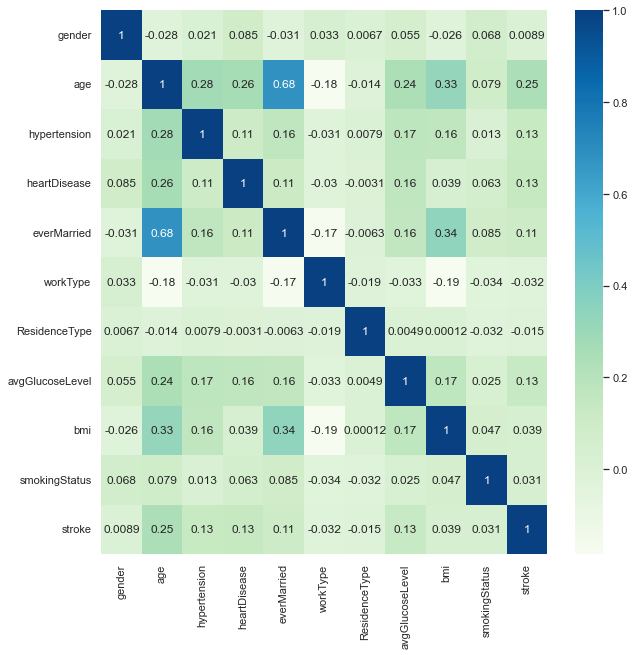

In [65]:
#Correlation matrix :
plt.figure(figsize=(10,10))
sns.heatmap(HealthD.corr(),cbar=True,annot=True,cmap='GnBu')

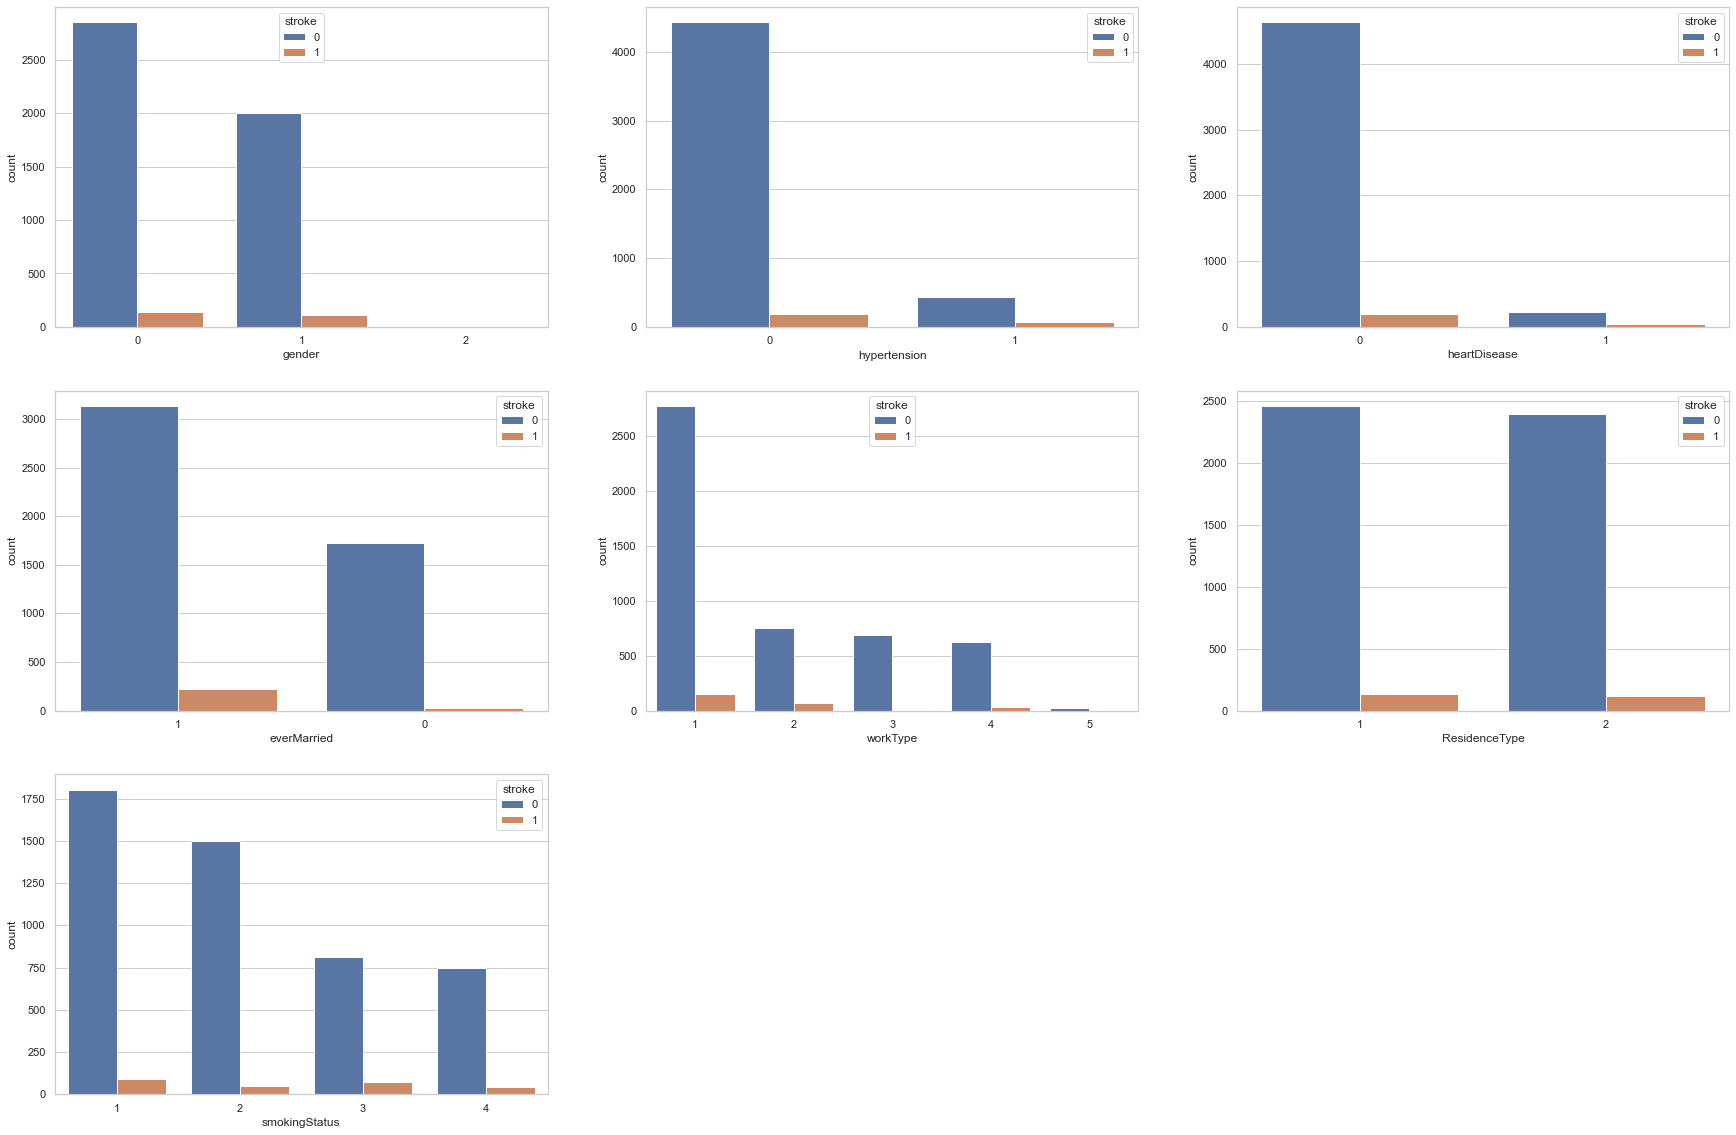

In [66]:
#Distribution of categorical features according to target variable :
fig = plt.figure(figsize=(30, 20))

i = 1
for col in data_categorical:
    if col != "stroke":
        fig.add_subplot(3,3,i)
        sns.countplot(x=col,data=HealthD,hue="stroke",order=HealthD[col].value_counts().index);
        i += 1

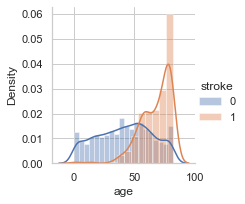

In [67]:
#FOR NUMIRCAL WITH TARGET VALUE 

#plotting the histogram of age,stroke
sns.FacetGrid(HealthD,hue='stroke').map(sns.distplot,"age").add_legend();

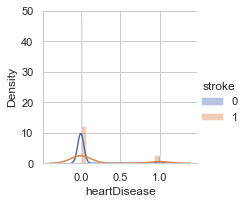

In [68]:
#plotting the histogram of age,stroke
sns.FacetGrid(HealthD,hue='stroke').map(sns.distplot,"heartDisease").add_legend();

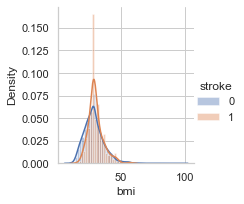

In [69]:
#FOR NUMIRCAL WITH TARGET VALUE 

#plotting the histogram of bmi,stroke
sns.FacetGrid(HealthD,hue='stroke').map(sns.distplot,"bmi").add_legend();

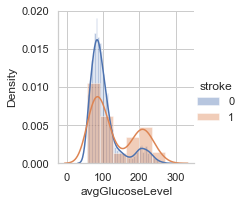

In [70]:
#FOR NUMIRCAL WITH TARGET VALUE 

#plotting the histogram of avgGlucoseLevel,stroke
sns.FacetGrid(HealthD,hue='stroke').map(sns.distplot,'avgGlucoseLevel').add_legend();

In [71]:
#save the new df into csv file
newDf = HealthD
newDf.to_csv("cleanDf.csv")

# Task 5 :  Apply diffrent Classification Method

In [214]:
#splitting the dataset into train and test diffult 75%,25%
X = HealthD.drop('stroke',axis=1)
y = HealthD['stroke']

In [215]:
#split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

X_train:  (4088, 10)
y_train:  (4088,)
X_test:  (1022, 10)
y_test:  (1022,)


# First method:  Logistic Regression

In [216]:
#apply the model (do object from the library)
logReg=LogisticRegression(solver='lbfgs',max_iter=1200000) 
#train the model by inter the train set to fit function
logReg.fit(X_train,y_train)

LogisticRegression(max_iter=1200000)

In [217]:
#Make the prediction
pred_log=logReg.predict(X_test)
pred_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [218]:
acc_log=accuracy_score(y_test,pred_log) # acurecy for test
print("Prediction Accuracy TEST for logistic regression: ",acc_log)
accRL = round(accuracy_score(y_test,pred_log) * 100, 2)
print("Prediction Accuracy TEST after round: ",accRL)

Prediction Accuracy TEST for logistic regression:  0.9393346379647749
Prediction Accuracy TEST after round:  93.93


In [220]:
accLGT=logReg.score(X_train,y_train) # acurecy for train
print("Prediction Accuracy TRAIN for logistic regression: ",accLGT)
accRLT = round(logReg.score(X_train,y_train) * 100, 2)
print("Prediction Accuracy TRAIN after round: ",accRLT)

Prediction Accuracy TRAIN for logistic regression:  0.9542563600782779
Prediction Accuracy TRAIN after round:  95.43


In [221]:
from sklearn import metrics #confusion matrix for logistic regression TESTING
print(metrics.classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [222]:
conf_met=metrics.confusion_matrix(y_test,pred_log)
print(conf_met)

[[960   0]
 [ 62   0]]


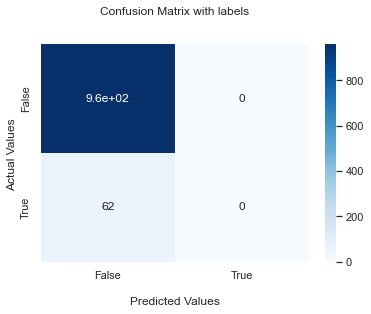

In [223]:
ax = sns.heatmap(conf_met, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Second method: SVM

In [224]:
#apply the model (do object from the library)
svc=SVC() 
#train the model by inter the train set to fit function
svc.fit(X_train,y_train)
 

SVC()

In [225]:
#Make the prediction
pred_sv=svc.predict(X_test) 
pred_sv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [227]:
acc_svc=accuracy_score(y_test,pred_sv) # acurecy for test
print("Prediction Accuracy TEST for SVC: ",acc_svc)
accCV= round(accuracy_score(y_test,pred_sv) * 100, 2)
print("Prediction Accuracy TEST after round: ",accCV)

Prediction Accuracy TEST for SVC:  0.9393346379647749
Prediction Accuracy TEST after round:  93.93


In [228]:
accSVCT=svc.score(X_train,y_train) # acurecy for train
print("Prediction Accuracy TRAIN for SVC: ",accSVCT)
accCVT = round(svc.score(X_train,y_train) * 100, 2)
print("Prediction Accuracy TRAIN after round: ",accCVT)

Prediction Accuracy TRAIN for SVC:  0.9542563600782779
Prediction Accuracy TRAIN after round:  95.43


In [229]:
print(metrics.classification_report(y_test,pred_sv)) #confusion matrix for SVM TESTING

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [230]:
conf_mett=metrics.confusion_matrix(y_test,pred_sv)
print(conf_mett)

[[960   0]
 [ 62   0]]


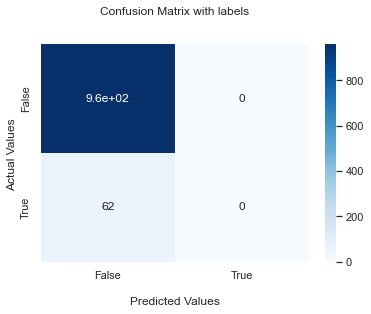

In [232]:
ax = sns.heatmap(conf_mett, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### third method: KNN

In [233]:
#CHOOSE suitable K with ellbow
error_rate=[]
#try
for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

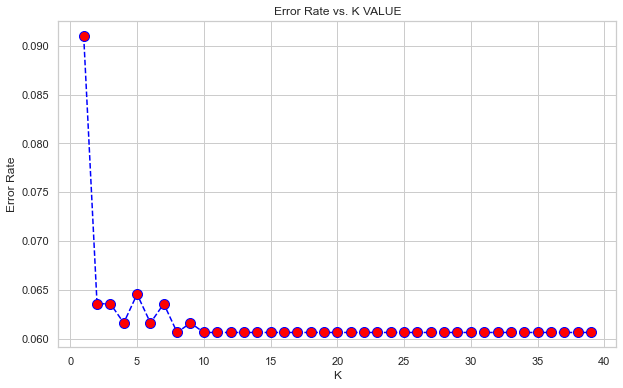

In [234]:
#plot
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K VALUE')
plt.xlabel('K')
plt.ylabel('Error Rate')
#we choose the smallist erro rate -----> 15

In [235]:
#apply the model (do object from the library)
knn=KNeighborsClassifier(n_neighbors=10)
#train the model by inter the train set to fit function
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [236]:
#Make the prediction
pred_knn=knn.predict(X_test)
pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [237]:
acc_knn=accuracy_score(y_test,pred_knn) # acurecy for test
print("Prediction Accuracy TEST for KNN: ",acc_knn)
accKNR = round(accuracy_score(y_test,pred_knn) * 100, 2)
print("Prediction Accuracy TEST after round: ",accKNR)

Prediction Accuracy TEST for KNN:  0.9393346379647749
Prediction Accuracy TEST after round:  93.93


In [238]:
accKNRT=knn.score(X_train,y_train) # acurecy for train
print("Prediction Accuracy TRAIN for KNN: ",accKNRT)
accKNRT = round(knn.score(X_train,y_train) * 100, 2)
print("Prediction Accuracy TRAIN after round: ",accKNRT)

Prediction Accuracy TRAIN for KNN:  0.9542563600782779
Prediction Accuracy TRAIN after round:  95.43


In [239]:
print(metrics.classification_report(y_test,pred_knn)) #confusion matrix for knn TESTING

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [240]:
conf_mettt=metrics.confusion_matrix(y_test,pred_knn)
print(conf_mettt)

[[960   0]
 [ 62   0]]


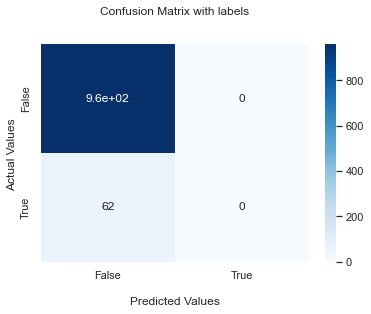

In [241]:
ax = sns.heatmap(conf_mettt, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

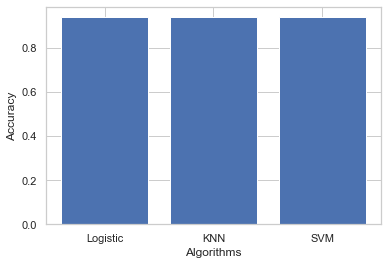

In [242]:
plt.bar(['Logistic','KNN','SVM'],[acc_log,acc_knn,acc_svc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

### sinse our DATASET IMBALENCED we will do resampling

In [243]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 187
Before OverSampling, counts of label '0': 3901 

before OverSampling, the shape of X_train: (4088, 10)
before OverSampling, the shape of y_train: (4088,) 

After OverSampling, the shape of X_train: (7802, 10)
After OverSampling, the shape of y_train: (7802,) 

After OverSampling, counts of label '1': 3901
After OverSampling, counts of label '0': 3901


In [244]:
models = [] #apply the models
models.append(['Logistic Regreesion', LogisticRegression(random_state=0 ,max_iter=1200000)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
# evaluate each model in turn
results = []
resultt = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_results = cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) 

In [245]:
lst_1= [] # do the calculations
for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[766 194]
 [ 26  36]]
Accuracy Score:  0.7847358121330724

K-Fold Validation Mean Accuracy: 79.39 %
Standard Deviation: 2.40 %

ROC AUC Score: 0.69

Precision: 0.16

Recall: 0.58

F1: 0.25
-----------------------------------

SVM :
[[703 257]
 [ 17  45]]
Accuracy Score:  0.7318982387475538

K-Fold Validation Mean Accuracy: 76.43 %
Standard Deviation: 1.75 %

ROC AUC Score: 0.73

Precision: 0.15

Recall: 0.73

F1: 0.25
-----------------------------------

KNeighbors :
[[789 171]
 [ 24  38]]
Accuracy Score:  0.8091976516634051

K-Fold Validation Mean Accuracy: 88.75 %
Standard Deviation: 0.86 %

ROC AUC Score: 0.72

Precision: 0.18

Recall: 0.61

F1: 0.28
-----------------------------------



### TASK 7 : EVALUATE THE MODELS

Logistic Regreesion :


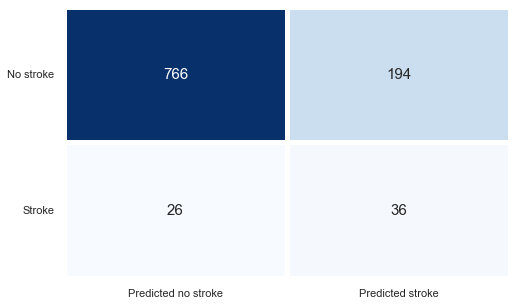

SVM :


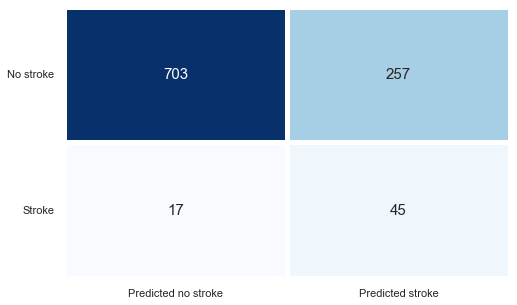

KNeighbors :


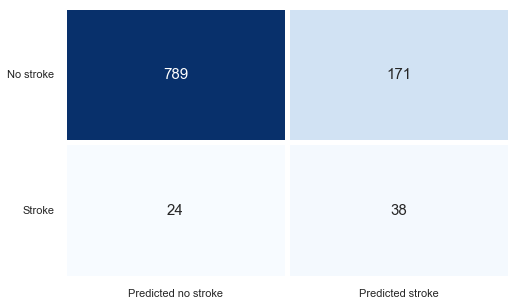

In [246]:

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    # Visualize confusion matrix
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
    yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
    plt.yticks(rotation = 0)
    plt.show()

In [257]:
df = pd.DataFrame(lst_1,columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
2,KNeighbors,80.919765,88.746397,0.860525,0.717389,0.181818,0.612903,0.280443
0,Logistic Regreesion,78.473581,79.390656,2.399901,0.689281,0.156522,0.580645,0.246575
1,SVM,73.189824,76.429282,1.752258,0.729049,0.149007,0.725806,0.247253


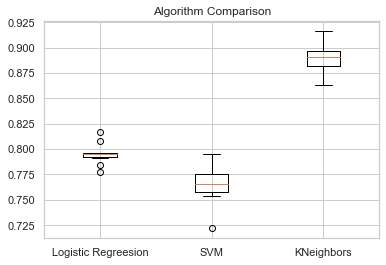

In [258]:
#models' K-Fold Mean Accuracy
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

### Task 6 : Experiment with different parameters in SVM

In [251]:
#Run SVM with linear kernel :
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train_res,y_train_res)

print ("Best parameters: ")
print (grid.best_params_) #to know Best values 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.768 total time=   3.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.793 total time=   4.4s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.785 total time=   3.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.806 total time=   3.8s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.817 total time=   4.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.768 total time=   3.8s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.793 total time=   4.2s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.785 total time=   4.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.806 total time=   4.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.817 total time=   3.9s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.768 total time=   3.8s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

In [254]:
grid_predictions = grid.predict(X_test)
print("Prediction Accuracy : ",
      metrics.accuracy_score(y_test,grid_predictions))
print("Prediction Accuracy after round: ",
      round(metrics.accuracy_score(y_test,grid_predictions)* 100, 2))

Prediction Accuracy :  0.7954990215264188
Prediction Accuracy after round:  79.55


In [247]:
# Run SVM with sigmoid kernel 
param_grid2 = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['sigmoid']}

grid2 = GridSearchCV(SVC(),param_grid2,refit=True,verbose=3)

grid2.fit(X_train_res,y_train_res)

print ("Best parameters: ")
print (grid2.best_params_) # to know Best values 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.500 total time=   1.7s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.500 total time=   1.6s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.500 total time=   1.7s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.500 total time=   2.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.500 total time=   1.5s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   1.7s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   1.6s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   1.6s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   1.6s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   1.6s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.500 total time=   1.5s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid

In [255]:
grid2_predictions = grid2.predict(X_test)
print("Prediction Accuracy: ",
      metrics.accuracy_score(y_test,grid2_predictions))
print("Prediction Accuracy after round: ",
      round(metrics.accuracy_score(y_test,grid2_predictions)* 100, 2))

Prediction Accuracy:  0.9393346379647749
Prediction Accuracy after round:  93.93


In [249]:
# Run SVM with rbf kernel 
param_grid3 = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

grid3 = GridSearchCV(SVC(),param_grid3,refit=True,verbose=3)

grid3.fit(X_train_res,y_train_res)

print ("Best parameters: ")
print (grid3.best_params_) #Best values

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   5.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   5.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   5.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   4.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   4.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   3.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.861 total time=   3.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   3.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.849 total time=   4.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.872 total time=   3.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.828 total time=   1.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [256]:
g3_predictions = grid3.predict(X_test)
print("Prediction Accuracy: ",
      metrics.accuracy_score(y_test,g3_predictions))
print("Prediction Accuracy after round: ",
      round(metrics.accuracy_score(y_test,g3_predictions)* 100, 2))

Prediction Accuracy:  0.8864970645792564
Prediction Accuracy after round:  88.65
